In [2]:
"""
  GNU GPL v3 License
 
  Copyright 2018 Niccolo` Tubini
 
  This program is free software: you can redistribute it and/or modify
  it under the terms of the GNU General Public License as published by
  the Free Software Foundation, either version 3 of the License, or
  (at your option) any later version.
 
  This program is distributed in the hope that it will be useful,
  but WITHOUT ANY WARRANTY; without even the implied warranty of
  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
  GNU General Public License for more details.
 
  You should have received a copy of the GNU General Public License
  along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

"""
Created on Tue Apr 17 14:52:22 2018

@author: Niccolo` Tubini

This code was obtained modifing the code pres_temp_4D_rd.py 
by Jeff Whitaker <jeffrey.s.whitaker@noaa.gov> 20070202
https://www.unidata.ucar.edu/software/netcdf/examples/programs/

"""

#from netCDF4_classic import Dataset
from netCDF4 import Dataset


import os

## pandas
import pandas as pd

## numpy
import numpy as np

## plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.transforms as transforms
import matplotlib.ticker as mtick

## to convert unix time to human readable date
import time
import datetime

# Richards 1D: input


Here you can read the .csv file used to create the grid. 
This file is used to plot layers limits in water content plots.

 your_path/data/RichardsMeshGen_input

In [3]:
os.chdir("C:/Users/Niccolo/OMS/OMS_Project_Richards1D/data/RichardMeshGen_input")
os.listdir()

['Casulli2010_test2.csv',
 'Casulli2010_test2VG.csv',
 'ClaySand_noPonding.csv',
 'ClaySand_noPonding.PNG',
 'Clay_noPonding.csv',
 'Clay_noPonding.PNG',
 'Clay_noPonding_BC.csv',
 'Clay_noPonding_Dry.csv',
 'Clay_noPonding_Kosugi.csv',
 'SandClay_01Ponding_Measurement.csv',
 'SandClay_01Ponding_Measurement.PNG',
 'Sand_01Ponding.csv',
 'Sand_01Ponding.PNG',
 'SiltSand_noPonding_Dunne.csv']

In [4]:
data = pd.read_csv("Casulli2010_test2.csv")

# Richards 1D: outputs

Here you can read the output of your simulation (.nc). 

Set in your_path/output

In [5]:
os.chdir("C:/Users/Niccolo/OMS/OMS_Project_Richards1D/output")
os.listdir()

['Casulli2010_test2VG_noRain_bottomDirichlet_300s.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_100s.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_100s_max.nc',
 'Casulli2010_test2_noRain_bottomDirichlet_300s.nc',
 'ClaySand_noPonding_TrentoRain_BottomDirichlet.nc',
 'Clay_01Ponding_noRain_BottomDirichlet.nc',
 'Clay_noPonding_2mmRain_BottomImpervious.nc',
 'Clay_noPonding_4mmRain_BottomImpervious.nc',
 'Clay_noPonding_Dry_2mmRain_bottomDirichlet0m.nc',
 'Clay_noPonding_noRain_05BottomDirichlet.nc',
 'Clay_noPonding_noRain_2mmBottomNeumann.nc',
 'Clay_noPonding_noRain_BottomDirichlet.nc',
 'Integrate PDE',
 'SandClay_noPonding_TrentoRain_BottomDirichlet.nc',
 'Sand_01Ponding_noRain_BottomDirichlet.nc',
 'Sand_01Ponding_noRain_BottomFreeDrainage.nc']

In [6]:
##########
##########

## open netCDF file for reading.
ncfile = Dataset('Casulli2010_test2_noRain_bottomDirichlet_300s.nc','r') 
print ('*** SUCCESS reading')

print('\n ***FILE INFO:\n')
print(ncfile)

## other usefull commands:
#print (ncfile.dimensions['time'])
#print (ncfile.file_format)
#print (ncfile.dimensions.keys())
print (ncfile.variables.keys())
#print (ncfile.variables['psi'])


depths = ncfile.variables['depth']
print('\n ***DEPTHS INFO:\n')
print(depths)

dualDepths = ncfile.variables['dual_depth']
print('\n ***DUAL DEPTH INFO:\n')
print(dualDepths)

time = ncfile.variables['time']
print('\n ***TIME INFO:\n')
print(time)

psi = ncfile.variables['psi']
print('\n ***PSI INFO:\n')
print(psi)

theta = ncfile.variables['water_heigth']
print('\n ***THETA INFO:\n')
print(theta)

iC = ncfile.variables['psiIC']
print('\n ***INITIAL CONDITION INFO:\n')
print(iC)

velocities = ncfile.variables['velocities']
print('\n ***VELOCITIES INFO:\n')
print(velocities)

error = ncfile.variables['error']
print('\n ***ERROR INFO:\n')
print(error)

topBC = ncfile.variables['topBC']
print('\n ***topBC INFO:\n')
print(topBC)

bottomBC = ncfile.variables['bottomBC']
print('\n ***bottomBC INFO:\n')
print(bottomBC)



*** SUCCESS reading

 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem: Casulli 2010, test 2 
 Grid input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D//data/Grid_NEtCDF/Casulli2010_test2.nc 
 TopBC input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D//data/Timeseries/TestAll_0.csv 
 BottomBC input file: C:\Users\Niccolo\OMS\OMS_Project_Richards1D//data/Timeseries/TestAll_0.csv, timeDelta = 300, interface k: mean
    dimensions(sizes): depth(301), dualDepth(301), time(4033)
    variables(dimensions): float64 depth(depth), float64 dual_depth(dualDepth), int32 time(time), float64 psi(time,depth), float64 psiIC(depth), float64 water_heigth(time,depth), float64 velocities(time,dualDepth), float64 error(time), float64 topBC(time), float64 bottomBC(time)
    groups: 

odict_keys(['depth', 'dual_depth', 'time', 'psi', 'psiIC', 'water_heigth', 'velocities', 'error', 'topBC', 'bottomBC'])

 ***D

Qui si possono leggere tutti gli attributi del file: una descrizione generale dei risultati e poi alcune utili informazioni sulle variabili e coordinate che sono state salvate.

la variabile water_heigth contiene i theta per le celle del suolo e total water depth per la superficie, e` un po' ambigua come nomencletura

##### create a vector of date in human readable formatting and two dataframe for boundary conditions

In [7]:
## creates a vector with human readable dates
dates = [datetime.datetime.fromtimestamp(t).strftime("%Y-%m-%d %H:%M") for t in time[:]]

## create a dataframe for boundary condition timeseries, this will simplify plotting
topBC_DF = pd.DataFrame(np.column_stack([dates, topBC]), 
                               columns=['Dates', 'topBC'])
topBC_DF.topBC=topBC_DF.topBC.astype(float)

topBC_DF=topBC_DF.set_index("Dates")


bottomBC_DF = pd.DataFrame(np.column_stack([dates, bottomBC]), 
                               columns=['Dates', 'bottomBC'])
bottomBC_DF.bottomBC=bottomBC_DF.bottomBC.astype(float)

bottomBC_DF=bottomBC_DF.set_index("Dates")

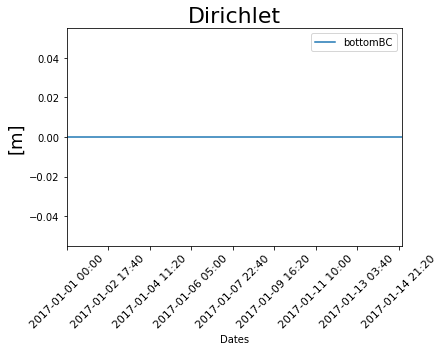

In [13]:
b = bottomBC_DF.plot(style='-')
## Dirichlet boundary condition
b.set_ylabel("[m]",fontsize=18)
b.set_title("Dirichlet",fontsize=22)
## Neumann boundary condition
#b.set_ylabel("[m/s]",fontsize=18)
#t.set_title("Neumann",fontsize=22)
#b.legend_.remove()
labels = b.get_xticklabels()
for label in labels:
    label.set_rotation(45)
    label.set_fontsize(11)

# Set some plot features

In [7]:
labelSize = 18
titleSize = 22
legendSize = 14
axisTicksSize = 14

lineWidth = 3
lineStyle =''

markerSize = 3
markerType = 'o'

figureSizeHeigth = 10
figureSizeWidth = 10
figureSizeHeigth1 = 10
figureSizeWidth1 = 20


# Plot initial condition

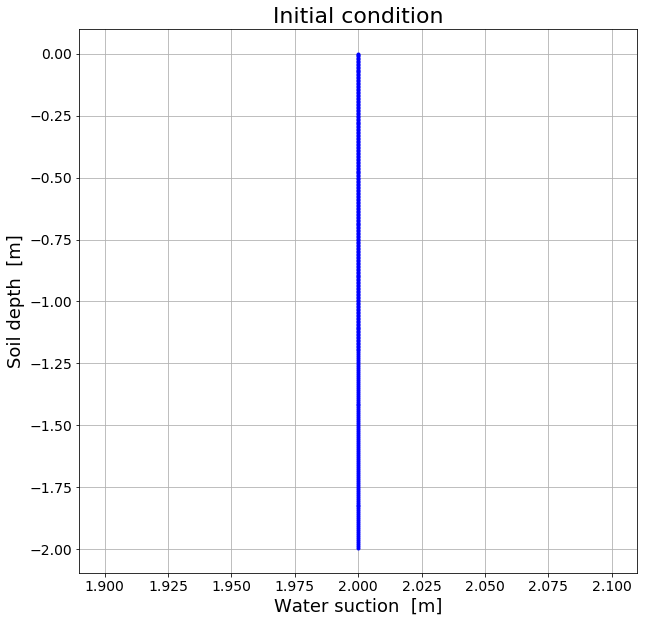

In [8]:
plt.figure(figsize=(figureSizeHeigth,figureSizeWidth))

plt.plot(iC,depths[:], linewidth=lineWidth, linestyle=lineStyle, marker=markerType, markersize=markerSize, color='b')
plt.title('Initial condition',fontsize=titleSize)
# use variable attributes to label axis
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.grid()
plt.show()


# Plot results

In [9]:
## enter the time index you want to plot
timeIndex = 3456;

## OR enter the date [yyyy-MM-dd HH:mm] you want to plot
#myDate = '2018-03-11 19:15'
#timeIndex = dates.index(myDate)


date = datetime.datetime.fromtimestamp(time[timeIndex])

In [10]:
print('Considero la soluzione per '+date.strftime('%Y-%m-%d %H:%M'))

Considero la soluzione per 2017-01-13 00:00


## Plot water suction

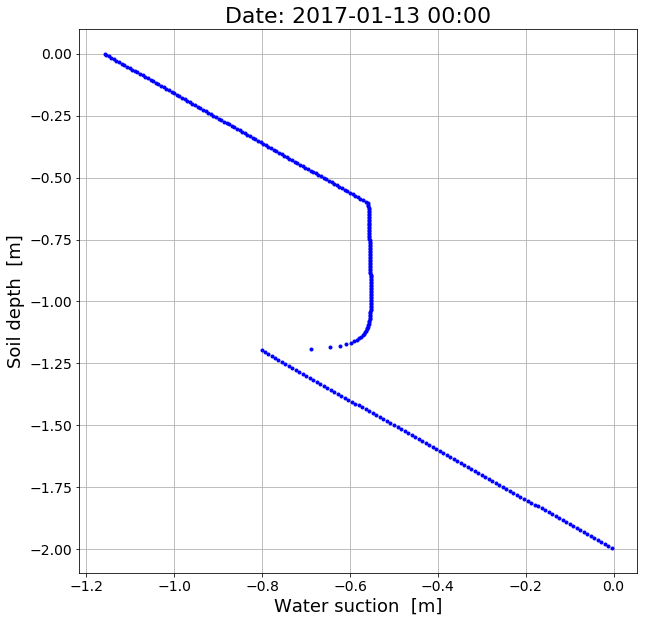

In [11]:

plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))

plt.plot(psi[timeIndex],depths[:], linewidth=lineWidth,linestyle=lineStyle, marker=markerType, markersize=markerSize, color='b')
# convert time value in a human readable date to title the plot
plt.title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
# use variable attributes to label axis
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.grid()
plt.show()


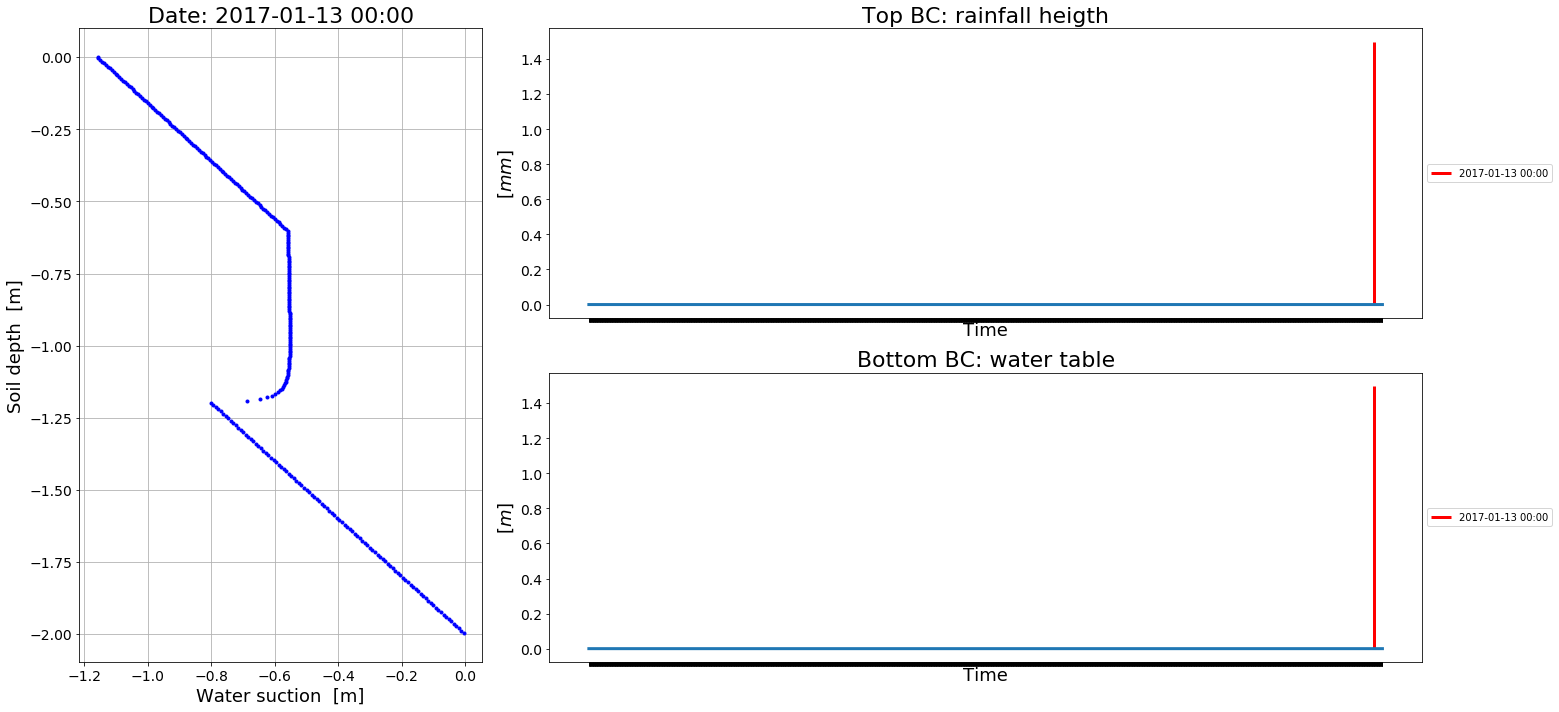

In [12]:
dateIndex = timeIndex
plt.figure(figsize=(figureSizeWidth1,figureSizeHeigth1))

axp = plt.subplot2grid((4, 6), (0, 0), rowspan=4, colspan=2)
axp.plot(psi[timeIndex],depths[:],linewidth=lineWidth, linestyle=lineStyle, marker=markerType, markersize=markerSize, color='b')
axp.set_xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']',fontsize=labelSize)
axp.set_ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize)
axp.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
axp.grid()

axb = plt.subplot2grid((4, 6), (2,2), rowspan=2, colspan=4)
axb.plot(bottomBC_DF[0:dateIndex+40], linewidth=lineWidth, label='_nolegend_')
axb.set_xlabel("Time",fontsize=labelSize)
axb.set_ylabel("[$m$]",fontsize=labelSize)
axb.set_title('Bottom BC: water table',fontsize=titleSize)
axb.vlines(x=dateIndex, ymin=np.min(bottomBC[:])*(0.5), ymax=(1.5), label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth,)
plt.legend()
axb.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axb.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

axt = plt.subplot2grid((4, 6), (0, 2), rowspan=2,colspan=4,sharex=axb)
axt.plot(topBC_DF[0:dateIndex+40],linewidth=lineWidth,)
axt.set_xlabel("Time",fontsize=labelSize)
axt.set_ylabel("[$mm$]",fontsize=labelSize)
axt.set_title('Top BC: rainfall heigth',fontsize=titleSize)
axt.vlines(x=dateIndex, ymin=np.min(topBC[:])*(0.5), ymax=(1.5), label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth,)
plt.legend()
axt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axt.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.tight_layout() 

## Plot hydraulic head
Is the hydraulic head $\psi + z$ that drives the water flow

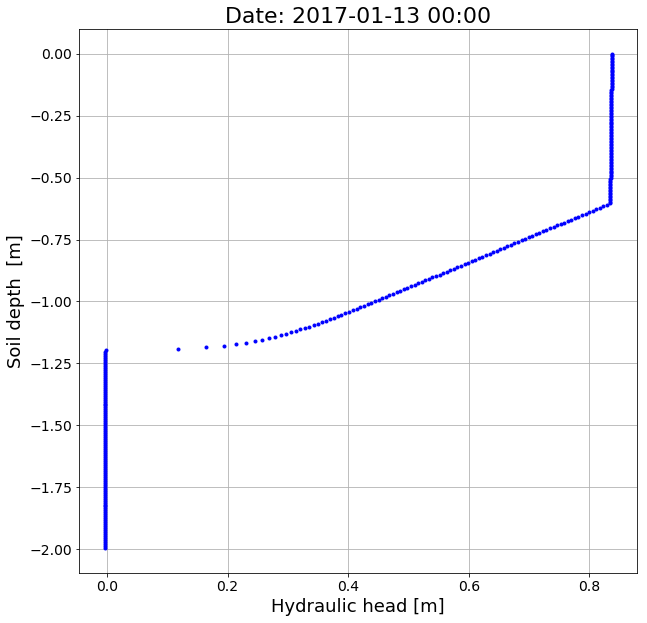

In [13]:

plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))

plt.plot(psi[timeIndex]+depths[:]-depths[0],depths[:], linewidth=lineWidth,linestyle=lineStyle, marker=markerType, markersize=markerSize, color='b')
# convert time value in a human readable date to title the plot
plt.title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
# use variable attributes to label axis
plt.xlabel('Hydraulic head [m]',fontsize=labelSize)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.grid()
plt.show()


## Plot water content and water depth

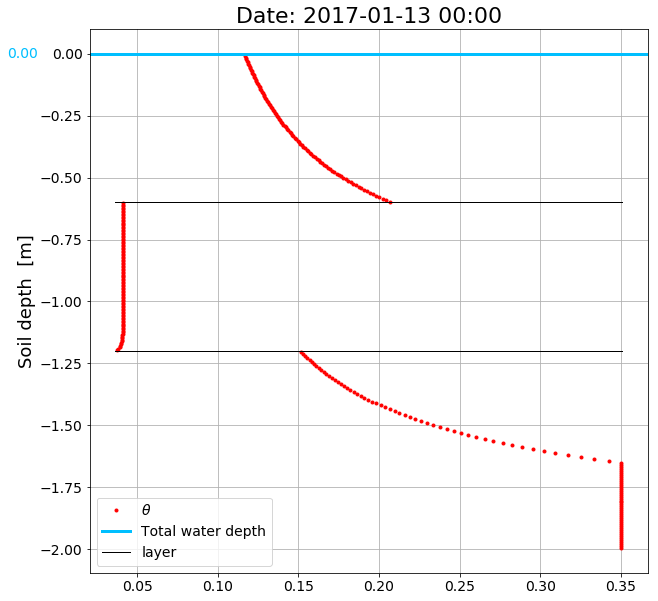

In [14]:

fig, ax=plt.subplots(figsize=(figureSizeWidth,figureSizeHeigth))
figsize=(20,20)
ax.plot(theta[timeIndex,0:depths[:].shape[0]-2],depths[0:depths[:].shape[0]-2], linewidth=lineWidth, linestyle=lineStyle, marker=markerType, markersize=markerSize, color='r')
waterLevel=theta[timeIndex,depths[:].shape[0]-1]
ax.axhline(y=waterLevel, color='deepskyblue',linewidth=lineWidth,)

# convert time value in a human readable date to title the plot
plt.title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
# use variable attributes to label axis
#plt.xlabel(ncfile.variables['water_heigth'].long_name + '  [' +ncfile.variables['water_heigth'].units +']',fontsize=labelSize )
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.ylim(depths[0]-0.1,waterLevel+0.1)

trans = transforms.blended_transform_factory(
        ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(-0.08,waterLevel, "{:.2f}".format(waterLevel), color="deepskyblue", transform=trans, 
        ha="right", va="center",fontsize=axisTicksSize)

for i in range(1,np.size(data.index)-1):
    if data['Type'][i] == 'L':
        c = 'black'
        l = 'layer'
        plt.plot([np.min(theta[timeIndex,0:np.size(theta[timeIndex,])-1])-0.001,np.max(theta[timeIndex,])+0.001], [data['eta'][i],data['eta'][i]], color=c,linewidth=lineWidth-2)

plt.legend(['$\\theta$', 'Total water depth','layer'], fontsize=legendSize,loc=3)

plt.grid()
plt.show()

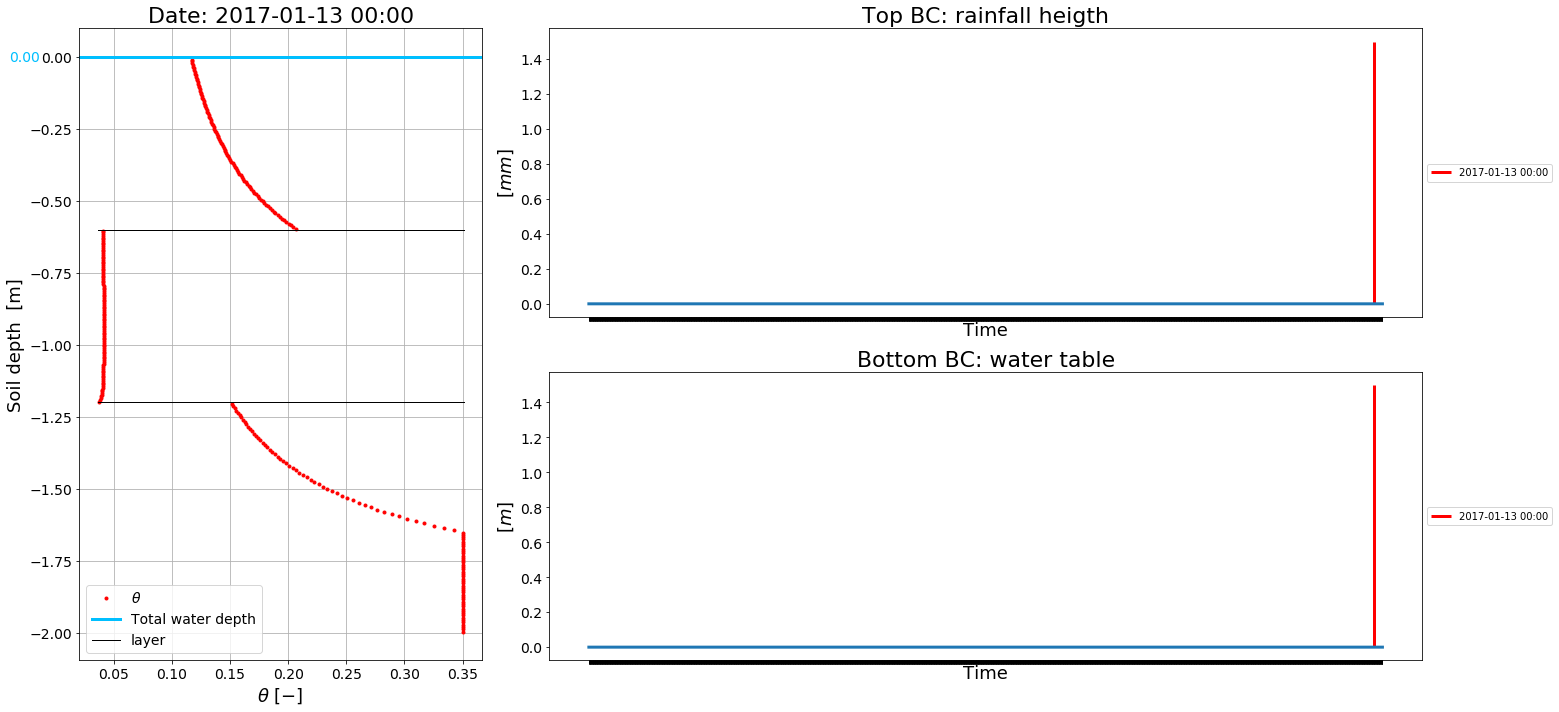

In [15]:
dateIndex = timeIndex
plt.figure(figsize=(figureSizeWidth1,figureSizeHeigth1))

axp = plt.subplot2grid((4, 6), (0, 0), rowspan=4, colspan=2)
axp.plot(theta[timeIndex,0:depths[:].shape[0]-2],depths[0:depths[:].shape[0]-2], linewidth=lineWidth, linestyle=lineStyle, marker=markerType, markersize=markerSize, color='r')
axp.axhline(y=theta[timeIndex,depths[:].shape[0]-1], color='deepskyblue',linewidth=lineWidth, linestyle='-')
for i in range(1,np.size(data.index)-1):
    if data['Type'][i] == 'L':
        c = 'black'
        l = 'layer'
        axp.plot([np.min(theta[timeIndex,0:np.size(theta[timeIndex,])-1])-0.001,np.max(theta[timeIndex,])+0.001], [data['eta'][i],data['eta'][i]], color=c,linewidth=lineWidth-2)

plt.legend(['$\\theta$', 'Total water depth','layer'], fontsize=legendSize,loc=3)
axp.set_title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
plt.xlabel('$\\theta$ [$-$]',fontsize=labelSize )
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)

# https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
trans = transforms.blended_transform_factory(
    axp.get_yticklabels()[0].get_transform(), axp.transData)
axp.text(-0.08,waterLevel, "{:.2f}".format(waterLevel), color="deepskyblue", transform=trans, 
        ha="right", va="center",fontsize=axisTicksSize)

plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)
axp.grid()

axb = plt.subplot2grid((4, 6), (2,2), rowspan=2, colspan=4)
axb.plot(bottomBC_DF[0:dateIndex+40],linewidth=lineWidth, label='_nolegend_')
axb.set_xlabel("Time",fontsize=labelSize)
axb.set_ylabel("[$m$]",fontsize=labelSize)
axb.set_title('Bottom BC: water table',fontsize=titleSize)
axb.vlines(x=dateIndex, ymin=np.min(bottomBC[:])*(0.5), ymax=(1.5), label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth)
plt.legend()
axb.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axb.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

axt = plt.subplot2grid((4, 6), (0, 2), rowspan=2,colspan=4,sharex=axb)
axt.plot(topBC_DF[0:dateIndex+40],linewidth=lineWidth,)
axt.set_xlabel("Time",fontsize=labelSize)
axt.set_ylabel("[$mm$]",fontsize=labelSize)
axt.set_title('Top BC: rainfall heigth',fontsize=titleSize)
axt.vlines(x=dateIndex, ymin=np.min(topBC[:])*(0.5), ymax=(1.5), label=date.strftime('%Y-%m-%d %H:%M'), color='r',linewidth=lineWidth)
plt.legend()
axt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axt.get_xticklabels(), visible=False)
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.tight_layout() 

## Velocities

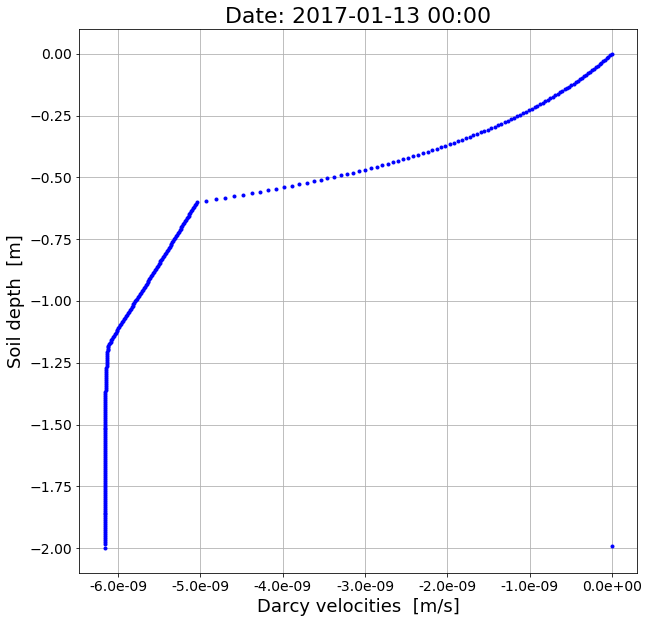

In [16]:
plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))

plt.plot(velocities[timeIndex],dualDepths[:], linewidth=lineWidth, linestyle=lineStyle, marker=markerType, markersize=markerSize, color='b')
# convert time value in a human readable date to title the plot
plt.title('Date: '+date.strftime('%Y-%m-%d %H:%M'),fontsize=titleSize)
# use variable attributes to label axis
plt.xlabel(ncfile.variables['velocities'].long_name + '  [' +ncfile.variables['velocities'].units +']',fontsize=labelSize)
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']',fontsize=labelSize )
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.xticks(fontsize=axisTicksSize)
plt.yticks(fontsize=axisTicksSize)
plt.grid()
plt.show()

## Error

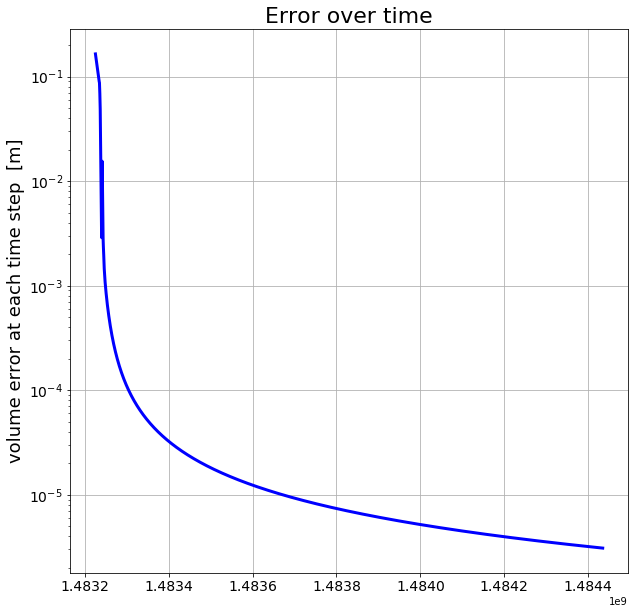

In [17]:
plt.figure(figsize=(figureSizeWidth,figureSizeHeigth))

plt.plot(time[:],abs(error[:]),'b',linewidth=lineWidth,)
plt.semilogy()
# convert time value in a human readable date to title the plot
plt.title('Error over time',fontsize = titleSize)
# use variable attributes to label axis
#plt.xlabel(ncfile.variables['error'].long_name + '  [' +ncfile.variables['error'].units +']' )
plt.ylabel(ncfile.variables['error'].long_name + '  [' +ncfile.variables['error'].units +']',fontsize = labelSize )
plt.tick_params(axis='both', which='major', labelsize=axisTicksSize)

plt.grid()
plt.show()

# Some plots with bokeh package

In [18]:
# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import BoxSelectTool
from bokeh.models import HoverTool

output_notebook()


Loading BokehJS ...

In [19]:
## https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#built-in-tools

hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
])

p1 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p1.scatter(psi[timeIndex,:], depths[:], color="blue")
p1.xaxis.axis_label = ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']'
p1.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p1.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p1.title.text = 'Date: '+date.strftime('%Y-%m-%d %H:%M')
p1.title.align = "center"
p1.title.text_font_size = str(titleSize) + "px"
tab1 = Panel(child=p1, title="Water suction")

p2 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p2.scatter(psi[timeIndex,:]+depths[:]-depths[0], depths[:], color="blue")
p2.xaxis.axis_label = 'Hydraulic head [m]'
p2.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p2.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p2.title.text = 'Date: '+date.strftime('%Y-%m-%d %H:%M')
p2.title.align = "center"
p2.title.text_font_size = str(titleSize) + "px"
tab2 = Panel(child=p2, title="Hydraulic head")

p3 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")
p3.scatter(theta[timeIndex,0:depths[:].shape[0]-2],depths[0:depths[:].shape[0]-2], color="red",legend='\u03B8 ')
p3.line([theta[timeIndex,0:depths[:].shape[0]-2].min(),theta[timeIndex,0:depths[:].shape[0]-2].max()], [theta[timeIndex,depths[:].shape[0]-1],theta[timeIndex,depths[:].shape[0]-1]], color="deepskyblue",line_width=lineWidth, legend='Total water level')
for i in range(1,np.size(data.index)-1):
    if data['Type'][i] == 'L':
        c = 'black'
        l = 'layer'
        p3.line([np.min(theta[timeIndex,0:np.size(theta[timeIndex,])-1])-0.001,np.max(theta[timeIndex,])+0.001], [data['eta'][i],data['eta'][i]], color=c,line_width=lineWidth-2,legend='Layer')

p3.legend.location = "bottom_left"
p3.legend.label_text_font_size = str(legendSize) + "px"
p3.legend.click_policy="hide"
#p3.xaxis.axis_label = '\u03B8 [-]'
p3.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p3.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p3.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p3.title.text = 'Date: '+date.strftime('%Y-%m-%d %H:%M')
p3.title.align = "center"
p3.title.text_font_size = str(titleSize) + "px"
tab3 = Panel(child=p3, title="Water content and water depth")

p4 = figure(plot_width=600, plot_height=600,tools=['pan,wheel_zoom,box_zoom,reset',hover],
           title="Mouse over the dots")

p4.scatter(velocities[timeIndex], dualDepths[:], color="black")
p4.xaxis.axis_label = ncfile.variables['velocities'].long_name + '  [' +ncfile.variables['velocities'].units +']'
p4.xaxis.axis_label_text_font_size = str(labelSize) + "px"
p4.yaxis.axis_label = ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']'
p4.yaxis.axis_label_text_font_size = str(labelSize) + "px"
p4.title.text = 'Date: '+date.strftime('%Y-%m-%d %H:%M')
p4.title.align = "center"
p4.title.text_font_size = str(titleSize) + "px"
tab4 = Panel(child=p4, title="Darcy velocities")

tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4 ])
show(tabs)

In [20]:
ncfile.close()